📊 Model Evaluation:
MSE: 3.44
RMSE: 1.85
R² Score: 0.6958


/tmp/ipython-input-2-1835166070.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region")
/tmp/ipython-input-2-1835166070.py:72: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


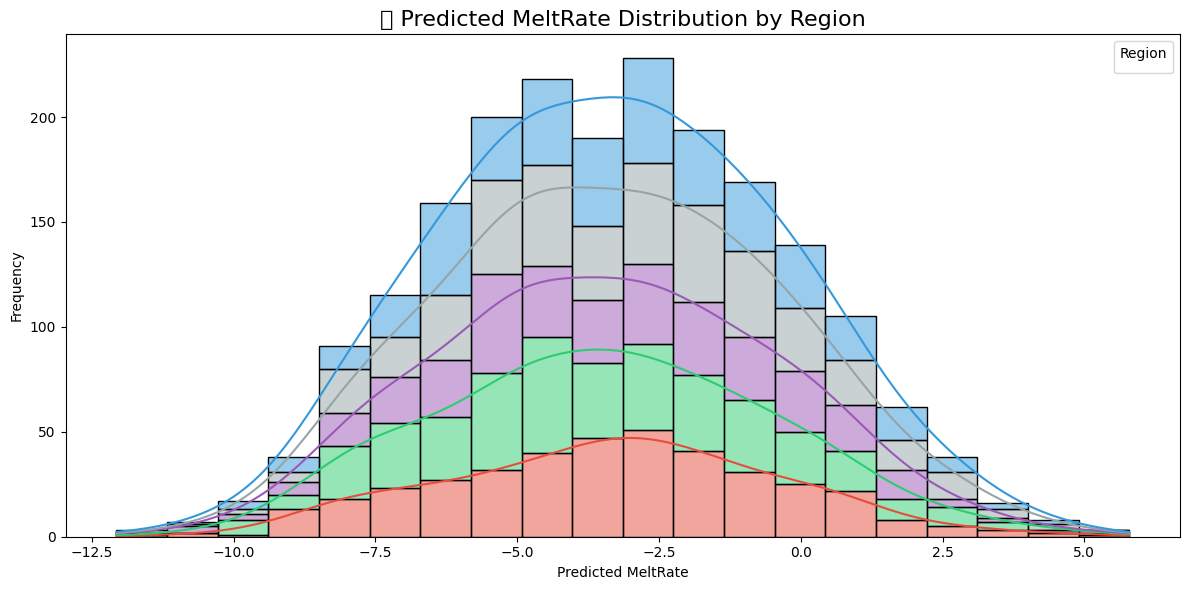

In [2]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📥 Load Dataset
df = pd.read_csv("/content/glacier_melt_dataset.csv")  # Replace with your actual dataset path if needed

# ✅ Keep original region for plotting
df_original = df.copy()

# 🧹 Encode categorical columns (Region & GlacierType)
df_encoded = pd.get_dummies(df, columns=['Region', 'GlacierType'], drop_first=True)

# 🎯 Features and Target
X = df_encoded.drop('MeltRate', axis=1)
y = df_encoded['MeltRate']

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Predictions
y_pred = model.predict(X_test)
y_full_pred = model.predict(X)

# ✅ Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))

# ➕ Add predictions to original dataframe
df_original['PredictedMeltRate'] = y_full_pred

# 🎨 Define Region Colors
region_palette = {
    'Himalayas': '#E74C3C',  # Red
    'Alps': '#95A5A6',       # Gray
    'Andes': '#3498DB',      # Blue
    'Arctic': '#9B59B6',     # Purple
    'Rockies': '#2ECC71'     # Green
}

# 📊 Plot Histogram by Region
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_original,
    x='PredictedMeltRate',
    hue='Region',
    multiple='stack',
    palette=region_palette,
    kde=True,
    bins=20
)

plt.title("📊 Predicted MeltRate Distribution by Region", fontsize=16)
plt.xlabel("Predicted MeltRate")
plt.ylabel("Frequency")
plt.legend(title="Region")
plt.tight_layout()
plt.show()
